In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv ('Mall.csv')
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df1['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

# Exploratory Data Analysis

## Age and Sex

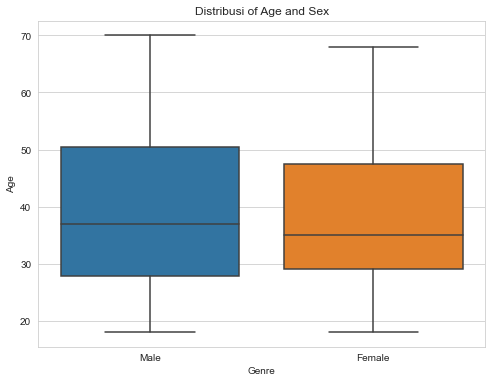

In [5]:
import seaborn as sns 
sns.set_style ('whitegrid')
plt.figure (figsize = (8,6))
sns.boxplot (x = 'Genre', y = 'Age', data = df1)
plt.title ('Distribusi of Age and Sex')
plt.xlabel ('Genre')
plt.ylabel ('Age')
plt.show()

## Annual Income

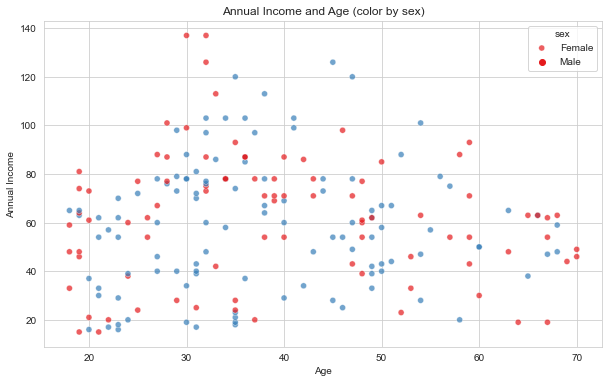

In [6]:
plt.figure (figsize = (10,6))
sns.scatterplot (data = df1, x = 'Age', y = 'Annual Income (k$)', hue = "Genre", palette = 'Set1', alpha = 0.7)
plt.title ("Annual Income and Age (color by sex)")
plt.xlabel ('Age')
plt.ylabel ('Annual Income')
plt.legend (title = 'sex', labels = ['Female', 'Male'], loc = 'upper right')
plt.show()

## Spending Score (1-100)

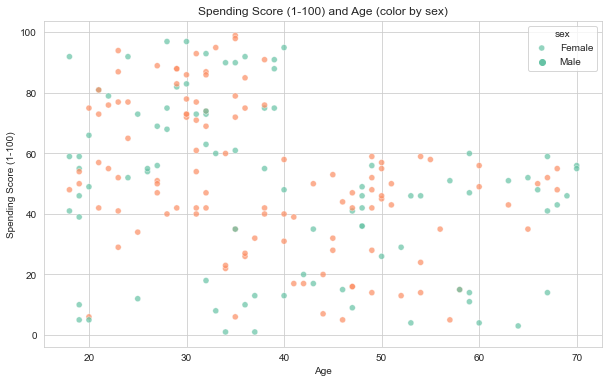

In [7]:
plt.figure (figsize = (10,6))
sns.scatterplot (data = df1, x = 'Age', y = 'Spending Score (1-100)', hue = "Genre", palette = 'Set2', alpha = 0.7)
plt.title ("Spending Score (1-100) and Age (color by sex)")
plt.xlabel ('Age')
plt.ylabel ('Spending Score (1-100)')
plt.legend (title = 'sex', labels = ['Female', 'Male'], loc = 'upper right')
plt.show()

## Spending Score (1-100) vs Annual Income

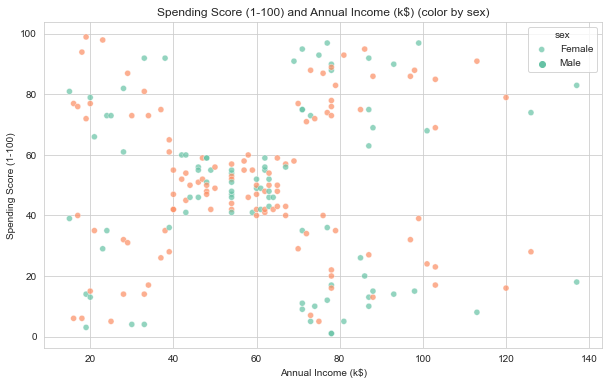

In [8]:
plt.figure (figsize = (10,6))
sns.scatterplot (data = df1, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = "Genre", palette = 'Set2', alpha = 0.7)
plt.title ("Spending Score (1-100) and Annual Income (k$) (color by sex)")
plt.xlabel ('Annual Income (k$)')
plt.ylabel ('Spending Score (1-100)')
plt.legend (title = 'sex', labels = ['Female', 'Male'], loc = 'upper right')
plt.show()

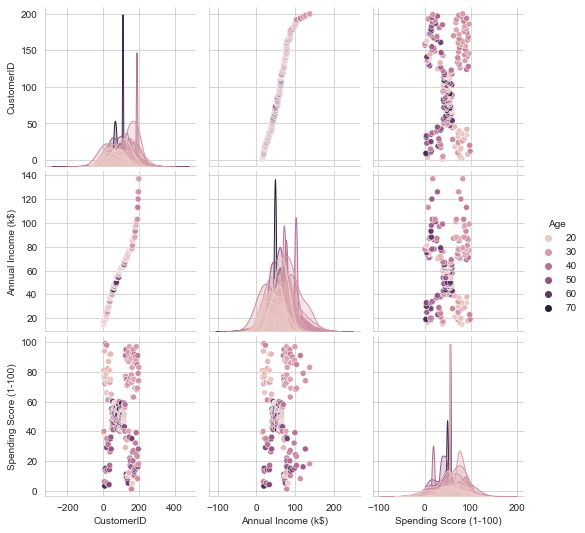

In [9]:
sns.pairplot(df1, hue="Age")
plt.show()

# Data Preprocessing 

In [10]:
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df1.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# K-Means 

In [12]:
# Replace df variable with value only from "Age, Annual Income, and Spending Score"
df = df1[['Age','Annual Income (k$)','Spending Score (1-100)', ]]

In [13]:
# transformation data 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
scaler = StandardScaler ()
df_scaled = scaler.fit_transform (df)

In [14]:
# build K-Means models with n_cluster = 4 
kmeans = KMeans (n_clusters = 4, init = 'k-means++', random_state = 23)
kmeans.fit (df_scaled)
centroids = kmeans.cluster_centers_
labels = kmeans.fit_predict (df_scaled)
df['cluster'] = labels

C:\Users\vannesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vannesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vannesa\AppData\Local\Temp\ipykernel_16016\2288133284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = labels


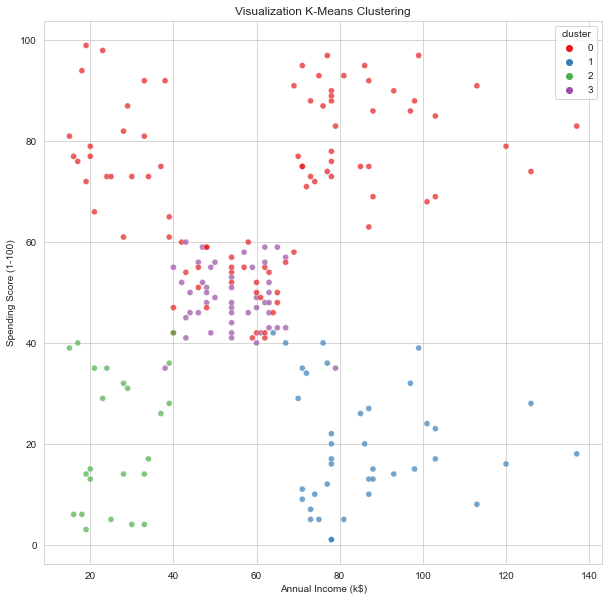

In [15]:
# visualization 2D of n K-Means 5 
plt.figure (figsize = (10,10))
sns.scatterplot (x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['cluster'], alpha = 0.7, palette = 'Set1')
plt.title ('Visualization K-Means Clustering')
plt.show()

C:\Users\vannesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vannesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vannesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vannesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

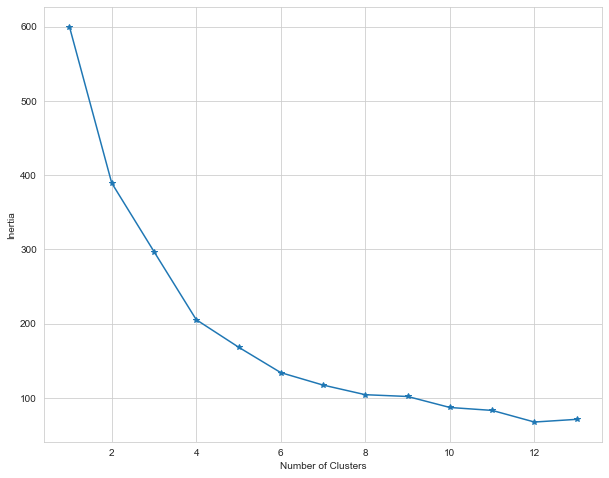

In [16]:
# Elbow Methods  
distance_values = []
for i in range (1, 14):
    kmeans = KMeans (n_clusters = i, init = 'k-means++')
    kmeans.fit (df_scaled)
    distance_values.append (kmeans.inertia_)
    
cluster_output = pd.DataFrame ({'Cluster' : range (1,14), 'distance_values' : distance_values})

plt.figure (figsize = (10,8))
plt.plot (cluster_output ['Cluster'], cluster_output ['distance_values'], marker = '*')
plt.xlabel ('Number of Clusters')
plt.ylabel ('Inertia')
plt.show ()

# Evaluation K-Means Clustering

In [17]:
# Silhouette Score
from sklearn.metrics import silhouette_score
score = silhouette_score (df_scaled, kmeans.labels_)
print (f'Silhouetee Score : {score}')

Silhouetee Score : 0.371058355519131


Silhouetee Score : 0.41664341513732767


C:\Users\vannesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vannesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vannesa\AppData\Local\Temp\ipykernel_16016\3184271945.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = labels


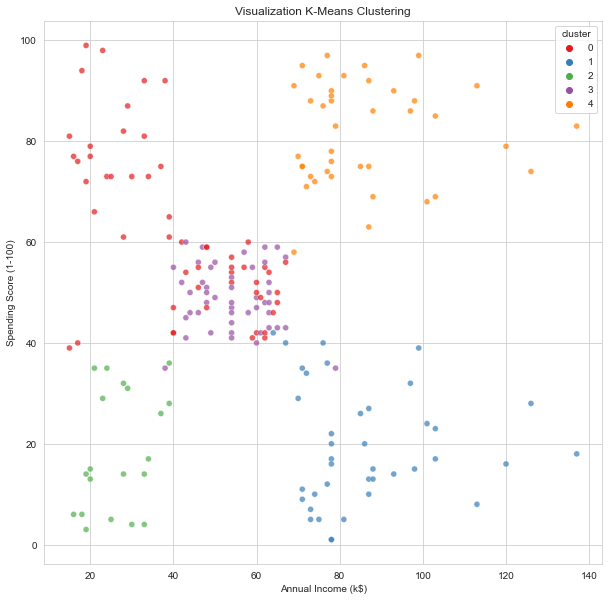

In [18]:
# build K-Means models with n_cluster = 5
kmeans1 = KMeans (n_clusters = 5, init = 'k-means++', random_state = 23)
kmeans1.fit (df_scaled)
centroids = kmeans1.cluster_centers_
labels = kmeans1.fit_predict (df_scaled)
df['cluster'] = labels
# Silhouette Score
from sklearn.metrics import silhouette_score
score = silhouette_score (df_scaled, kmeans1.labels_)
print (f'Silhouetee Score : {score}')
# visualization 2D of n K-Means 5 
plt.figure (figsize = (10,10))
sns.scatterplot (x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['cluster'], alpha = 0.7, palette = 'Set1')
plt.title ('Visualization K-Means Clustering')
plt.show()

# Visualization 

In [19]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,2
3,23,16,77,0
4,31,17,40,0


In [20]:
df['cluster'].unique()

array([0, 2, 3, 1, 4])

In [21]:
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

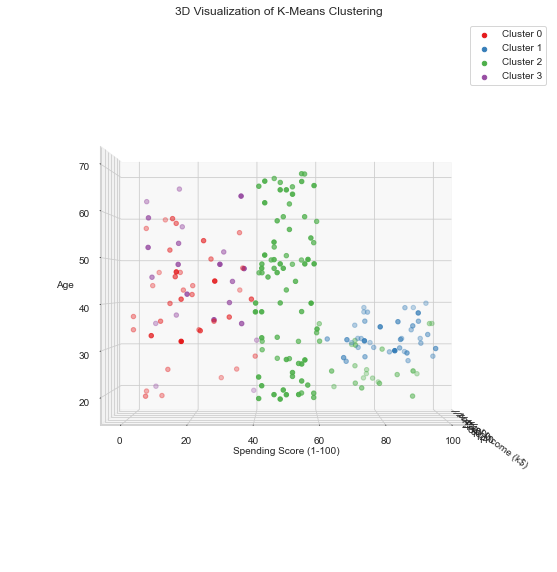

In [29]:
# Vizualization 3D of K-Means Methods 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract data for the 3D features (replace with actual column names)
cluster_labels = df['cluster']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Use a color palette for cluster visualization (optional)
palette = sns.color_palette("Set1", n_colors=len(set(cluster_labels))) 

# Scatter plot with coloring based on clusters
for i, cluster in enumerate(set(cluster_labels)):
    data_cluster = df[cluster_labels == cluster]
    ax.scatter(data_cluster['Annual Income (k$)'], data_cluster['Spending Score (1-100)'], data_cluster['Age'],
               c=palette[i], label=f'Cluster {cluster}')

# Add labels and title
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title('3D Visualization of K-Means Clustering')
ax.view_init(elev=0, azim=0)

# Optional: Add legend (if using color palette for clusters)
plt.legend()
plt.show()


In [23]:
import pandas as pd
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool


# Convert the DataFrame to a ColumnDataSource for Bokeh
source = ColumnDataSource(df1)


# Create the figure
p = figure(title='Interactive Scatter Plot Age and Spending Score')

# Add scatter plot with color based on a column
p.circle(x='Age', y='Spending Score (1-100)', source=source, color = 'Age', size=10)

# Add hover tool with tooltip information
hover = HoverTool()
hover.tooltips = [
    ('Annual Income (k$)', '@x'),
    ('Spending Score (1-100)', '@y'),
    ('Age', '@Age'),
    ('Genre', '@Genre')
]
p.add_tools(hover)

# Show the interactive plot
show(p)


In [24]:
import pandas as pd
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool


# Convert the DataFrame to a ColumnDataSource for Bokeh
source = ColumnDataSource(df1)


# Create the figure
p = figure(title='Interactive Scatter Plot Age and Annual Income')

# Add scatter plot with color based on a column
p.circle(x='Age', y='Annual Income (k$)', source=source, color = 'Age', size=10)

# Add hover tool with tooltip information
hover = HoverTool()
hover.tooltips = [
    ('Annual Income (k$)', '@x'),
    ('Spending Score (1-100)', '@y'),
    ('Age', '@Age'),
    ('Genre', '@Genre')
]
p.add_tools(hover)

# Show the interactive plot
show(p)


# DBSCAN

In [25]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Assuming your data is in a pandas DataFrame named 'df'

# Extract data for clustering (replace with actual column names)
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan.fit(data)

# Get cluster labels
cluster_labels = dbscan.labels_

# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Explore and analyze the results


C:\Users\vannesa\AppData\Local\Temp\ipykernel_16016\3291102675.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_labels


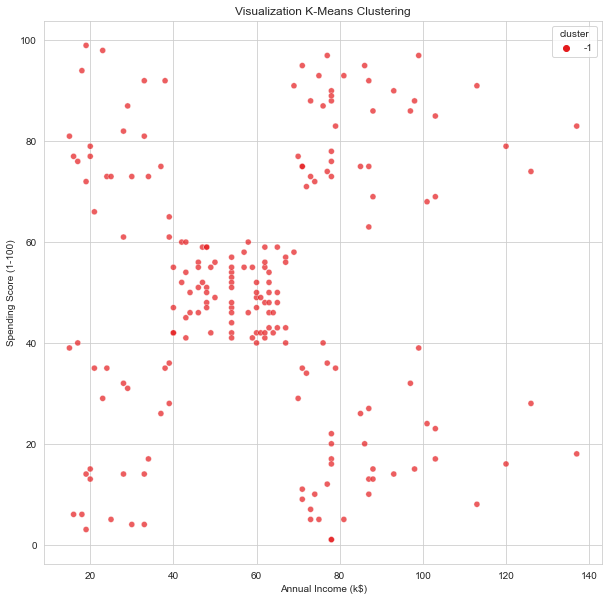

In [26]:
# visualization 2D of n K-Means 5 
plt.figure (figsize = (10,10))
sns.scatterplot (x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['cluster'], alpha = 0.7, palette = 'Set1')
plt.title ('Visualization K-Means Clustering')
plt.show()

# hierarchical clustering 

C:\Users\vannesa\AppData\Local\Temp\ipykernel_16016\2398915035.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = clusters


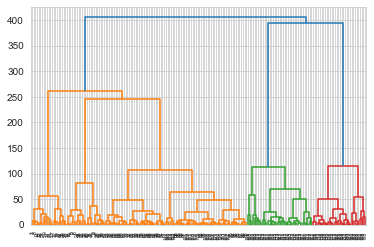

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd

# Assuming your data is in a pandas DataFrame named 'df'

# Extract data for clustering (replace with actual column names)
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
# Perform linkage (hierarchical clustering)
linked = linkage(data, method='ward', metric='euclidean')

# Create a dendrogram
dendrogram(linked)

# Cut the dendrogram at a desired level to obtain clusters
threshold = 30  # Adjust threshold as needed
clusters = fcluster(linked, threshold, depth=0) 

# Add cluster labels to the DataFrame
df['cluster'] = clusters

# Explore and analyze the results


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Preprocessing step: StandardScaler for feature scaling
scaler = StandardScaler()

# Clustering step: KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4)
# Combine preprocessing and clustering steps into a pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('kmeans', kmeans)
])

data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Fit the pipeline to the data
pipeline.fit(data)
transformed_data = pipeline.transform(data)

# Get the predicted cluster labels for each data point
cluster_labels = pipeline.predict(data)

# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Explore and analyze the clustered data

C:\Users\vannesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vannesa\AppData\Local\Temp\ipykernel_16016\417388190.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_labels


# Data Storytelling